# 1. Pendulum dynamics introduction

In this notebook the dynamics of a pendulum are briefly introduced, to highlight the applicability of learning this non-linear dynamics problem with a Koopman operator theory based approach

## Equations of motion of a pendulum

The differential equation governing the motion of a pendulum is defined by:

\begin{equation}
\frac{d^2 \theta }{dt^2} + \frac{g}{l} sin \theta = 0,
\label{eq1}
\end{equation}

where $\theta$ is the angle, $g$ gravity, and $l$ the length of the rod. Mass, friction, and any additional torques are ignored for this tutorial.

As the motion of the pendulum is governed solely by two variables, the angle $\theta$ and the angular velocity $\dot{\theta}$, a state space formulation is used where the state of the system is given by the vector:

\begin{equation}
x = [\theta,\dot{\theta}]
\end{equation}

Given this, the dynamics function for calculating the next timestep is:

\begin{equation}
f = \dot{x} = [\dot{\theta},\ddot{\theta}],
\end{equation}

where $\ddot{\theta}$ is the angular accelleration, and is given by the non-linear equation:

\begin{equation}
\ddot{\theta} = \frac{g}{l} \sin(\theta)
\end{equation}

# Python Example
Given these equations, a trajectory of motion of $N$ timesteps can be simulated. In this, the rk4 solver is used:

## Define experimental parameters

In [1]:
import numpy as np
N = 150    # Number of timesteps to simulate for
dt = 0.02  # Step size
g = -9.81  # Gravity
l = 1      # Length of rod
x0 = [1,0] # Initial state

f = lambda x : [x[1], (g/l)*np.sin(x[0])] # Dynamics function

## Create a function for simulating trajectories according to f

In [2]:
def generate_trajectory(N,x0):
    t = np.zeros(N)      # timesteps
    x = np.zeros((2,N))  # empty state matrix
    x[:,0] = x0          # initialise

    # For each timestep  
    for n in range(N-1):        
        # rk4 solver
        a = np.multiply(dt,f(x[:,n]))
        b = np.multiply(dt,f(x[:,n]+.5*a))
        c = np.multiply(dt,f(x[:,n]+.5*b))
        d = np.multiply(dt,f(x[:,n]+c))

        # Simulate next step
        x[:,n+1] = x[:,n]+(1/6)*(a+2*b+2*c+d)
        t[n+1]   = t[n]+dt   
    return x

# Example: Simulate an trajectory

In [3]:
x = generate_trajectory(N,x0)

## Visualise

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from IPython import display
sns.set(font_scale=1)

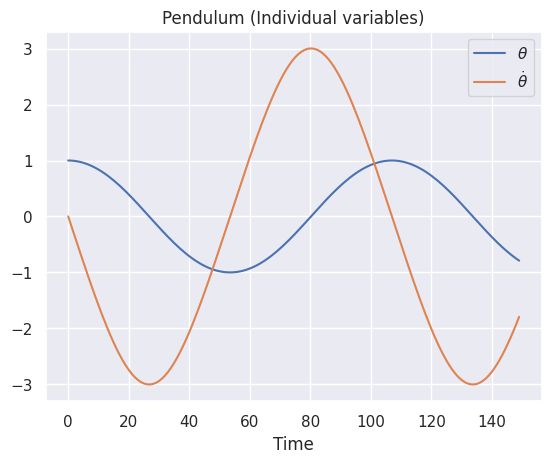

In [5]:
fig = plt.figure()
_ = plt.plot(x.T,label=[r'$\theta$',r'$\dot{\theta}$'])
plt.xlabel('Time')
plt.title('Pendulum (Individual variables)')
plt.legend()

## Plot the swinging pendulum, and the phase space

Given the above code, we can now see what the state space of this problem looks like

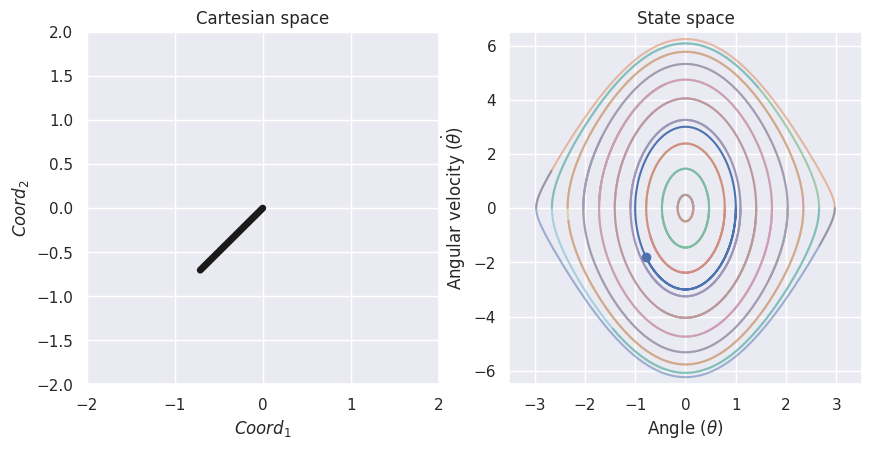

In [6]:
# create background and axes
fig, (ax1,ax2)  = plt.subplots(1,2,figsize=(10,8))
ax1.set_xlim(-l*2, l*2)
ax1.set_ylim(-l*2, l*2)
ax2.set_xlim(-l*3.5, l*3.5)
ax2.set_ylim(-l*6.5, l*6.5)
ax1.set_xlabel(r'$Coord_1$')
ax1.set_ylabel(r'$Coord_2$')
ax2.set_xlabel(r'Angle $(\theta)$')
ax2.set_ylabel(r'Angular velocity $(\dot{\theta})$')
ax1.set_title('Cartesian space')
ax2.set_title('State space')
ax1.set_aspect(np.diff(ax1.get_xlim())[-1]/np.diff(ax1.get_ylim())[-1])
ax2.set_aspect(np.diff(ax2.get_xlim())[-1]/np.diff(ax2.get_ylim())[-1])

# Define objects
rod, = ax1.plot([],linewidth=5,color='k') 
phase = ax2.scatter([],[]) 

# Plot the entire state trajectory of the example
ax2.plot(x[0,:],x[1,:])

# Compute the tip (Cartesian) coordinates for the example trajectory (the end position of the rod)
tip_coord_axis1 = l*np.sin(x[0,:])
tip_coord_axis2 = -l*np.cos(x[0,:])

# Plot some different initial conditions to cover the state space
for ic in np.deg2rad(np.linspace(-170,170,20)):
    xi = generate_trajectory(N,[ic,0])
    ax2.plot(xi[0,:],xi[1,:],alpha=0.5)

# Define the animation of the swinging pendulum and position in state space
def animate(frame_num):
    rod.set_data(([0,tip_coord_axis1[frame_num]], [0,tip_coord_axis2[frame_num]]))
    phase.set_offsets([x[0,frame_num], x[1,frame_num]])
    return rod,phase

# Compute animation
anim = animation.FuncAnimation(fig, animate, frames=N, interval=20, blit=True)

# Render for HTML5
from IPython.display import HTML
HTML(anim.to_html5_video())

# Nonlinearity

As can be seen in the above video, the $\sin$ function in the equations of motion creates non-linearity in the state space (the elongation). In the context of the pendulum, this corresponds to an change in the trajectory shape for large displacements, and simple harmonic motion for small displacements.  

## Generate example trajectories
To further visualise this, consider the following trajectories

In [7]:
# Example of a small displacement trajectory
x0_small = [np.deg2rad(6),0]
x_small= generate_trajectory(N*5,x0_small)

# Example of a large displacement trajectory
x0_large = [np.deg2rad(179),0]
x_large = generate_trajectory(N*5,x0_large)

## Plot trajectories

Text(0, 0.5, 'Angular velocity $(\\dot{\\theta})$')

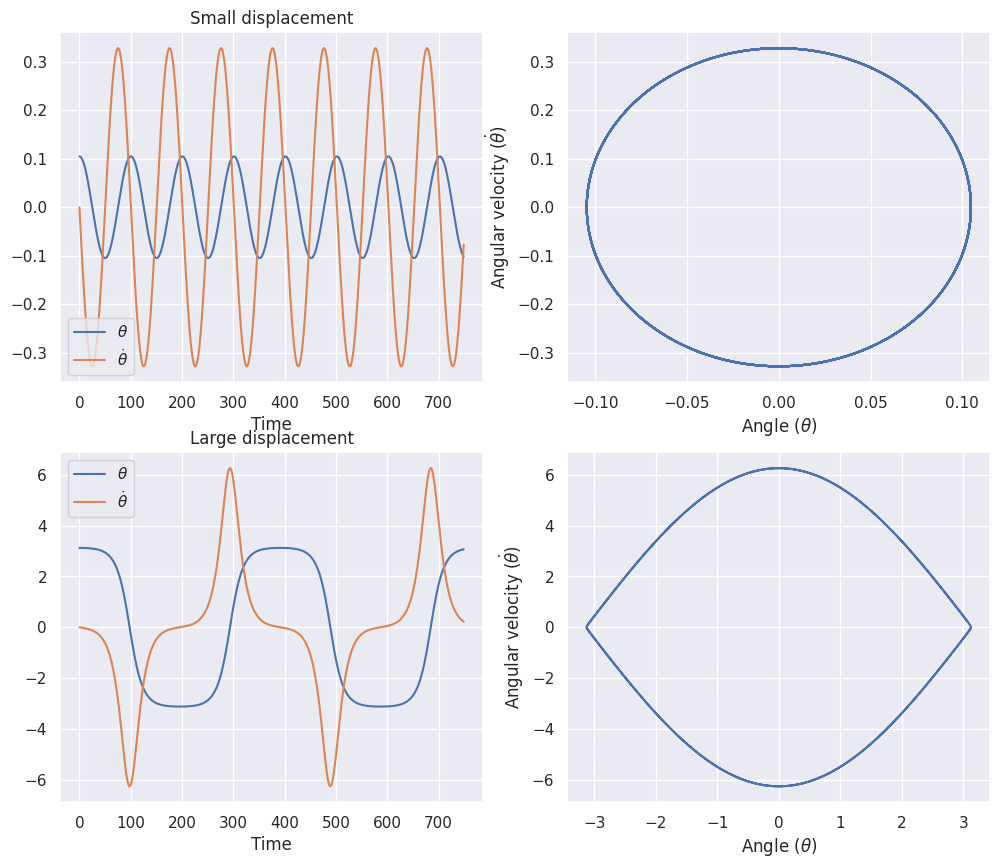

In [8]:
fig = plt.figure(figsize=(12,10))
plt.subplot(221)
_ = plt.plot(x_small.T,label=[r'$\theta$',r'$\dot{\theta}$'])
plt.xlabel('Time')
plt.legend()
plt.title('Small displacement')

plt.subplot(222)
_ = plt.plot(x_small[0,:],x_small[1,:])
plt.xlabel(r'Angle $(\theta)$')
plt.ylabel(r'Angular velocity $(\dot{\theta})$')

plt.subplot(223)
_ = plt.plot(x_large.T,label=[r'$\theta$',r'$\dot{\theta}$'])
plt.xlabel('Time')
plt.legend()
plt.title('Large displacement')

plt.subplot(224)
_ = plt.plot(x_large[0,:],x_large[1,:])
plt.xlabel(r'Angle $(\theta)$')
plt.ylabel(r'Angular velocity $(\dot{\theta})$')

## Summary:

This notebook has briefly demonstrated the dynamics of the pendulum, and shown these to be relatively simple, low-dimensional, and non-linear. As such, this is a good use-case for examining learning these dynamics with a Koopman based approach. 

See the next notebook, [B. Learning pendulum dynamics - small angle approximation](), for a first look at applying Koopman theory to the pendulum problem.